In [206]:
# ПЕРВИЧНАЯ НАСТРОЙКА
print("АКТИВАЦИЯ ПАКЕТОВ")
%pip install numpy
%pip install matplotlib
import numpy as np
import matplotlib.pyplot as plt
import math
import IPython.display as ipyd
ipyd.clear_output(wait=False)

# 3 - Движение частицы в поле плоского конденсатора
Частица влетает в поле конденсатора параллельно пластинам вдоль оси конденсатора. Частица имеет массу $m$ и заряд $q$ (знак не определен). Под действием поля конденсатора частица отклоняется к одной из пластин (в зависимости от знака заряда) и к концу пути попадает на неё. Координату, где упала частица можно измерить. Известны также расстояние между пластинами и напряжение на конденсаторе.<br>
Создать модель поведения частицы с возможностью изучения её траектории в зависимости от изменяемых параметров системы (масса, знак и модуль заряда частицы, расстояние между пластинами конденсатора, а также другие параметры являются входными данными для задачи).<br>
Определить закон, по которому изменяется траектория движения частицы. Учесть влияние силы тяжести на частицу и визуализировать траекторию движения частицы в виде графика.

# Вычисление

> Настройки и вычисление ниже

### Формулы
1. $E=\frac{V}{D}$
2. $\frac{F_{Эл}}{q} = \frac{E}{M}$
2. $y''(t) = \frac{qE}{m}$
3. $\Delta t = \frac{x}{v_0}$

### Решение

Из 2 формулы: $F_{Эл} = \frac{qE}{m}$<br>
Тогда полная сила: $F = F_{Эл} + F_{Грав} = \frac{qE}{m} + gm$<br>
Подставим в формулу 2 формулу 1: $y''(t) = \frac{qV}{mD} + gm$ <br>
Продифференцируем по $t$: $y(t) = (\frac{qV}{mD} + gm)\cdot\frac{t^2}{2}$ <br>
Подставим $x$ из 3 формулы: $y(x) = \frac{1}{2}\cdot(\frac{qV}{mD} + gm)\cdot\big(\frac{x}{v_0}\big)^2$

Возьмём начальную точку за $(0,0)$.<br>
Тогда, точка касания $x_{кас}$ находится как:<br>
$\begin{cases} x = x_{кас} \\ y(x) = \frac{D}{2} \end{cases}\quad\implies\quad x_{кас} = v_0 D \sqrt{\frac{m}{Vq+gm^2D}} $<br>
А время до касания, находим из формулы 3:<br>
$t_{кас} = \frac{x_{кас}}{v_0}$

In [223]:
# НАСТРОЙКИ ПРОГРАММЫ
# Масса частицы [кг]
m  = 2e-27
# Заряд частицы [кл]
q  = -1.6e-19
# Начальная скорость частицы [м/с]
v0 = 50000
# Расстояние между пластинами [м]
D  = 0.2
# Напряжение на конденсаторе [В]
V = 10
# Знак верхней пластины, 1 - положительный, -1 - отрицательный
top_plate = 1

In [218]:
# ВЫЧИСЛЕНИЯ
E = V/D
g = 9.8
g_coeff = 1 if (q*top_plate >= 0) else -1

def y_t(t: float) -> float:
    global q, V, m, D, v0, g_coeff
    return ((q*V)/(m*D) + g_coeff*g*m)*(t**2)/2

def y_x(x: float) -> float:
    global q, V, m, D, v0, g_coeff
    return ((q*V)/(m*D) + g_coeff*g*m)*((x**2)/(v0**2))/2

x_kaboom = v0 * D * np.sqrt(m/(V*np.abs(q) + g_coeff*g*D*m*m))

t_kaboom = x_kaboom/v0

ipyd.display(ipyd.Math( f"x_{{кас}} = {x_kaboom} \\text{{ м}}" ))
ipyd.display(ipyd.Math( f"t_{{кас}} = {t_kaboom} \\text{{ с}}" ))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

# График

In [219]:
# НАСТРОЙКИ ГРАФИКА
# Разрешение кривой по оси x
step = 0.01
# Отступы по осям (x,y)
padding = (0.05, 0.05)

No handles with labels found to put in legend.


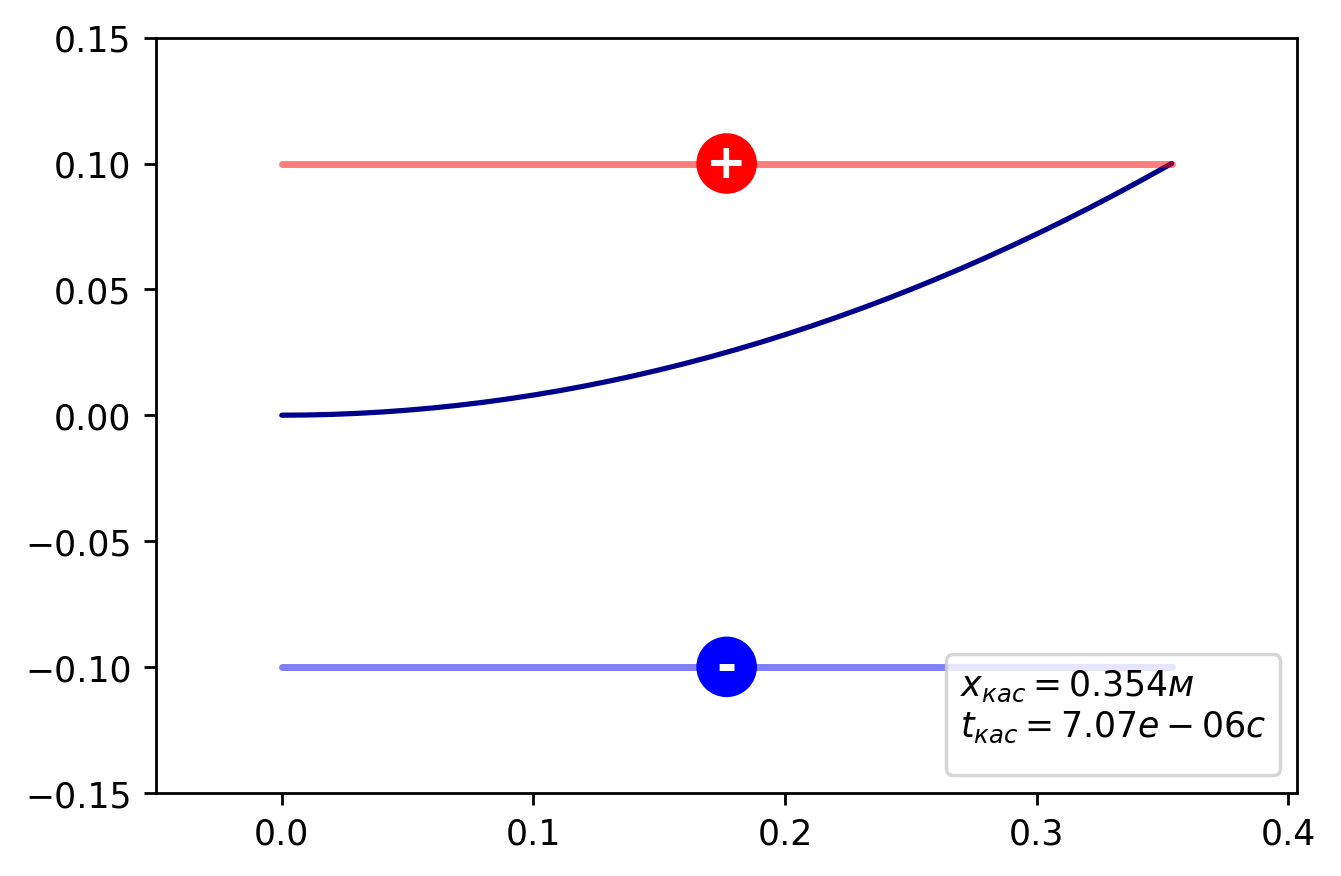

In [224]:
# ГРАФИК
# Initial setup
plt.figure(dpi=250)
plt.ylim(-D/2-padding[1],D/2+padding[1])
plt.xlim(0-padding[0], x_kaboom+padding[0])

# Graph
x_coords = [0]
while x_coords[-1] <= x_kaboom:
    x_coords.append(x_coords[-1] + step)
x_coords[-1] = x_kaboom
y_coords = [-top_plate*y_x(x) for x in x_coords]
line_color = "darkred" if q > 0 else "darkblue"
plt.plot(x_coords, y_coords, color=line_color, solid_capstyle='round')

# Condensers
cond_circ_rad = (x_kaboom+2*padding[0])*0.025
# Positive
plt.plot([0, x_kaboom], [top_plate*D/2, top_plate*D/2], color="r", alpha=0.5, linewidth=2, solid_capstyle='round')
plt.gca().add_patch(
    plt.Circle((x_kaboom/2, top_plate*D/2), radius=cond_circ_rad, color="r")
)
plt.text(x=(x_kaboom/2), y=top_plate*D/2, s="+", color="w", va="center", ha="center", weight="bold", fontsize=14)
# Negative
plt.plot([0, x_kaboom], [-top_plate*D/2, -top_plate*D/2], color="b", alpha=0.5, linewidth=2, solid_capstyle='round')
plt.gca().add_patch(
    plt.Circle((x_kaboom/2, -top_plate*D/2), radius=cond_circ_rad, color="b")
)
plt.text(x=(x_kaboom/2), y=-top_plate*D/2, s="-", color="w", va="center", ha="center", weight="bold", fontsize=14)

# Final touches
plt.legend(
    title = (
        r"$x_{кас}=" + f"{x_kaboom:.3g}м$\n" +
        r"$t_{кас}=" + f"{t_kaboom:.3g}c$"
    ),
    loc= "upper right" if y_coords[-1] < 0 else "lower right"
)
plt.gca().set_aspect(1)
plt.show()